MN2023_A2_LK2

Ketua Kelompok:
1. Rayhan Egar Sadtya Nugraha (225150201111014)

Anggota kelompok: 
1. Hugo Alfedo Putra (225150201111013)
2. Arion Syemael Siahaan (2251502071110060)

Soal Latihan 2

1. Solve for $x^2e^{-x/2} - 1 = 0$ for [0, 2] interval using bisection.
2. Solve for $x^3 - 5x + 1 = 0$ for (0, 1) with 4 iterations using secant.

* Soal latihan selanjutnya berada setelah latihan 2

Jawaban nomor 1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

# soal 1

def bisection(a, b, threshold, fx):

    er = lambda cc, cp: abs((cc-cp)/cc) * 100
    
    # calculate initial c0
    c0 = (a+b) / 2

    print("Init: ", a, b, c0)
    print("a\tb\tfx(a)\tfx(b)\tc0\tfx(c0)\tc1\tfx(c1)\ter")

    condition0 = fx(a) * fx(b)
    
    # first iteration outside loop to find c1
    if (condition0 < 0):
        if ((fx(a) * fx(c0)) > 0):
            a = c0
        elif ((fx(a) * fx(c0)) < 0):
            b = c0
        else:
            return b
    
    # calculate c1
    c1 = (a+b) / 2
    
    print(f'{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{c0:.3f}\t{fx(c0):.3f}\t{c1:.3f}\t{fx(c1):.3f}\t{er(c0, c1):.3f}')

    while(er(c0, c1) > threshold):
        
        # calculate current condition
        condition_current = fx(a) * fx(c1)

        # update either a or b with c1
        if(condition_current > 0):
            a = c1
        elif(condition_current < 0):
            b = c1

        # update c0 with c1
        c0 = c1

        # calculate new c1 using recently updated a and b
        c1 = (a+b) / 2

        print(f'{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{c0:.3f}\t{fx(c0):.3f}\t{c1:.3f}\t{fx(c1):.3f}\t{er(c0, c1):.3f}')
    
    return c1

In [4]:
lk02_1 = lambda x : np.power(x, 2) * np.power(np.e, -(x/2)) - 1
a_1 = 0; b_1 = 2
answer_lk02_1 = bisection(a_1, b_1, 1e-5, lk02_1)

print(f'\nAkar persamaan: {answer_lk02_1:.3f}')

Init:  0 2 1.0
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
1.000	2.000	-0.393	0.472	1.000	-0.393	1.500	0.063	50.000
1.000	1.500	-0.393	0.063	1.500	0.063	1.250	-0.164	16.667
1.250	1.500	-0.164	0.063	1.250	-0.164	1.375	-0.049	10.000
1.375	1.500	-0.049	0.063	1.375	-0.049	1.438	0.007	4.545
1.375	1.438	-0.049	0.007	1.438	0.007	1.406	-0.021	2.174
1.406	1.438	-0.021	0.007	1.406	-0.021	1.422	-0.007	1.111
1.422	1.438	-0.007	0.007	1.422	-0.007	1.430	0.000	0.549
1.422	1.430	-0.007	0.000	1.430	0.000	1.426	-0.003	0.273
1.426	1.430	-0.003	0.000	1.426	-0.003	1.428	-0.002	0.137
1.428	1.430	-0.002	0.000	1.428	-0.002	1.429	-0.001	0.068
1.429	1.430	-0.001	0.000	1.429	-0.001	1.429	-0.000	0.034
1.429	1.430	-0.000	0.000	1.429	-0.000	1.429	-0.000	0.017
1.429	1.430	-0.000	0.000	1.429	-0.000	1.430	-0.000	0.009
1.430	1.430	-0.000	0.000	1.430	-0.000	1.430	0.000	0.004
1.430	1.430	-0.000	0.000	1.430	0.000	1.430	-0.000	0.002
1.430	1.430	-0.000	0.000	1.430	-0.000	1.430	-0.000	0.001
1.430	1.430	-0.000	0.000	1.430	-0.000	1

Jawaban nomor 2

In [5]:
def secant(a, b, threshold, fx, max_iter=20):
    
    diff = lambda a, b, fx: fx(b) * (b-a) / (fx(b) - fx(a))
    next = lambda a, b, fx: b - (fx(b) * (b-a) / (fx(b) - fx(a))) 

    i = 1
    er = abs(diff(a, b, fx))

    print('i\ta\tb\tfx(a)\tfx(b)\ter')

    while (er >= threshold) & (i <= max_iter):

        print(f'{i:d}\t{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{er:.3f}')
        
        # calculate next b value
        next_b = next(a, b, fx)

        # update a and b values
        a = b
        b = next_b

        # calculate error using recently updated a and b
        er = abs(diff(a, b, fx))

        i+=1
    
    return b

In [6]:
lk02_2 = lambda x: np.power(x, 3) - 5 * x + 1
a_2 = 0
b_2 = 1
answer_lk02_2  = secant(a_2, b_2, 1e-5, lk02_2, 4)
print(f'\nAkar persamaan: {answer_lk02_2:.3f}')

i	a	b	fx(a)	fx(b)	er
1	0.000	1.000	1.000	-3.000	0.750
2	1.000	0.250	-3.000	-0.234	0.064
3	0.250	0.186	-0.234	0.074	0.015
4	0.186	0.202	0.074	-0.000	0.000

Akar persamaan: 0.202


Soal Latihan 1.a - Metode Biseksi

1. Diketahui f(x) = sin(10x) + cos(3x), interval [3, 6] dengan increment step 0.01.
    - Buat program untuk menggambar fungsi f(x)
    - Tentukan dua titik awal a dan b
    - Cari nilai akar f(x)

2. Ubah program untuk mengevaluasi threshold berdasarkan rumus berikut
    $$ |E_r| = |\frac{c_c - c_p}{c_c} \times 100|$$

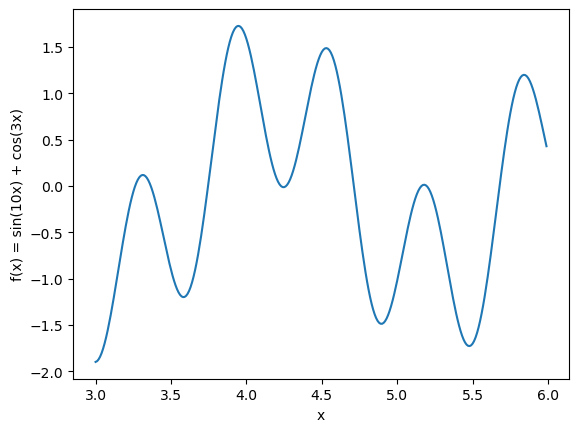

In [14]:
fx1a = lambda x: np.sin(10 * x) + np.cos(3 * x)
lowerbound = 3
upperbound = 6
step = .01

# fungsi untuk plot grafik
def plot(fx, lowerbound, upperbound, step):
    x = np.arange(lowerbound, upperbound, step)
    fx = fx(x)
    plt.plot(x, fx)
    plt.xlabel('x')
    plt.ylabel('f(x) = sin(10x) + cos(3x)')
    plt.show()

plot(fx1a, lowerbound, upperbound, step)

In [20]:
a = 3.5
b = 4.0

# Menggunakan metode biseksi, dengan titik a(3.5, f(a)) dan titik b(4.0, f(b))
# Threshold error relatif sebesar 0.05%

akar1a = bisection(a, b, .5, fx1a)
print(f'\nAkar persamaan: {akar1a:.3f}')

Init:  3.5 4.0 3.75
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
3.500	3.750	-0.904	0.054	3.750	0.054	3.625	-1.113	3.333
3.625	3.750	-1.113	0.054	3.625	-1.113	3.688	-0.667	1.724
3.688	3.750	-0.667	0.054	3.688	-0.667	3.719	-0.330	0.847
3.719	3.750	-0.330	0.054	3.719	-0.330	3.734	-0.142	0.420

Akar persamaan: 3.734


Latihan 1.b - Metode Regula Falsi

Mencari akar persamaan $x^3 - 2x^2 + 6x - 4 = 0$ dengan ketentuan:
1. a = 0,
2. b = 1,
3. error threshold = 0.0001, 
4. dan iterasi maksimum 10 kali


In [21]:
def regula_falsi(a, b, threshold, fx):

    print("Init: ", a, b)
    print("i\ta\tb\tfx(a)\tfx(b)\tc0\tfx(c0)\tc1\tfx(c1)\ter abs(fx(c0))")

    if fx(a) * fx(b) < 0:

        i = 1

        # calculate c0
        c0 = b - (fx(b) * (b - a) / (fx(b) - fx(a)))

        while (abs(fx(c0)) > threshold) & (i <= 10):
            
            # calculate c1, first iteration result is identical with first c0
            c1 = b - (fx(b) * (b - a)/(fx(b) - fx(a)))

            # update a or b with c1
            if fx(a) * fx(c1) > 0:
                a = c1
            elif fx(a) * fx(c1) < 0:
                b = c1
            
            print(f'{i}\t{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{c0:.3f}\t{fx(c0):.3f}\t{c1:.3f}\t{fx(c1):.3f}\t{abs(fx(c0)):.3f}')

            # update c0 with c1
            c0 = c1
            i += 1
            
        return c1
    
fx2b = lambda x: np.power(x, 3) - 2 * np.power(x, 2) + 6 * x - 4
a = 0
b = 1
threshold = 1e-4

akar2a = regula_falsi(a, b, threshold, fx2b)
print(f'\nAkar persamaan: {akar2a:.3f}')

Init:  0 1
i	a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er abs(fx(c0))
1	0.000	0.800	-4.000	0.032	0.800	0.032	0.800	0.032	0.032
2	0.000	0.794	-4.000	0.002	0.800	0.032	0.794	0.002	0.032
3	0.000	0.793	-4.000	0.000	0.794	0.002	0.793	0.000	0.002
4	0.000	0.793	-4.000	0.000	0.793	0.000	0.793	0.000	0.000

Akar persamaan: 0.793


Latihan Newton-Raphson

Menghitung akar $f(x) = e^x - 5x^2$ dengan:
1. Initial guess = 1
2. Error threshold = 0.00001

In [25]:
def newton_raphson(init_guess, fx, fprimex, max_iteration, threshold):
    
    next = lambda x0, fx, fprimex: x0 - (fx(x0) / fprimex(x0))
    x0 = init_guess

    print("Init: ", x0, "Max-Iter: ", max_iteration, "Threshold: ", threshold)
    print("\ni\tx0\tfx(0)\tf'x(x0)\tx1\ter")

    for i in range(max_iteration):

        # calculate value for initial guess
        fx0 = fx(x0)

        # calculate value for f'(x0)
        fprimex0 = fprimex(x0)

        # calculate next point, x1
        x1 = next(x0, fx, fprimex)

        # return x1 if less than threshold
        if abs(x0 - x1) < threshold:
            return x1
        
        print(f'{i}\t{x0:.3f}\t{fx0:.3f}\t{fprimex0:.3f}\t{x1:.3f}\t{abs(x0-x1):.3f}')
        
        # update x0 to x1
        x0 = x1

fx1c = lambda x: np.power(np.e, x) - 5 * np.power(x, 2)
fprimex1c = lambda x: np.power(np.e, x) - 10 * x
init = 1
threshold = 1e-5

akar1c = newton_raphson(init, fx1c, fprimex1c, 10, threshold)
print(f'\nAkar persamaan: {akar1c:.3f}')

Init:  1 Max-Iter:  10 Threshold:  1e-05

i	x0	fx(0)	f'x(x0)	x1	er
0	1.000	-2.282	-7.282	0.687	0.313
1	0.687	-0.370	-4.879	0.611	0.076
2	0.611	-0.023	-4.266	0.605	0.005
3	0.605	-0.000	-4.221	0.605	0.000

Akar persamaan: 0.605


Latihan Secant

Menghitung akar $f(x) = e^x - 5x^2$ dengan:
1. a = 0.5
2. b = 1
3. Error threshold = 0.00001

In [26]:
fx2a = lambda x: np.power(np.e, x) - 5 * np.power(x, 2)
a = 0.5
b = 1
threshold = 1e-5

akar2a = secant(a, b, threshold, fx2a, )
print(f'\nAkar persamaan: {akar2a:.3f}')

i	a	b	fx(a)	fx(b)	er
1	0.500	1.000	0.399	-2.282	0.426
2	1.000	0.574	-2.282	0.126	0.022
3	0.574	0.597	0.126	0.036	0.009
4	0.597	0.606	0.036	-0.001	0.000

Akar persamaan: 0.605
